## Use Cases
##### Below are four data-science use cases with each using different data types and analytical techniques. We will then focus on one of the use cases in more detail.

## Use Case 1 – Forecasting Demand for Hotel Rooms and/or Charter Flights (Time Series Forecasting)

### Business problem:
Predict occupancy rates and flight bookings 1–12 months ahead.

### Data used:
Historical daily/weekly occupancy %, bookings per day, cancellations, promotions, seasonality, regional events.

### Techniques:

Time Series Decomposition (trend, seasonality, residuals)

ARIMA / SARIMA

Error metrics: MAE, RMSE

### Business Value:
Better pricing, staffing decisions, fuel planning for flights, inventory optimisation.

## Use Case 2 – Customer Churn Prediction for Hotels & Car Rentals (Classification / Prediction)

### Business problem:
Identify customers likely to stop booking with V.Ger within the next 6 months.

### Data used:
CRM logs, past booking frequency, complaints, use of promotions, NPS score, spend, demographics.

### Techniques:

Logistic Regression


### Business Value:
Targeted retention campaigns → reduced churn → increased customer lifetime value.

## Use Case 3 – A/B Testing of Website Layout and Promotion Designs (Experimental Analysis)

### Business problem:
Increase online booking conversion by comparing website designs.

### Data used:
Click-through rates, time on page, heatmaps, conversion rates, number of abandoned carts.

### Techniques:

Hypothesis testing (t-test, chi-squared)

Conversion uplift analysis

Confidence intervals

### Business Value:
Improves booking efficiency and maximises revenue from web traffic.

## Use Case 4 – Customer Satisfaction Analysis for Hotels (Regression + Text Mining)

### Business problem:
Understand which factors (cleanliness, staff rating, price, Wi-Fi quality, room type) most influence customer satisfaction.

### Data used:
Survey responses, star ratings, free-text reviews.

### Techniques:

Regression models (linear regression, random forest regressor)

NLP sentiment scoring

Correlation analysis

### Business Value:
Prioritising improvements that actually drive satisfaction → more 5-star reviews → increased demand.

## Chosen Case for detailed analysis - CASE 1: Forecasting Demand for Hotel Rooms 

## Business Objectives

#### Hotel occupancy is one of the most important operational metrics for V.Ger Travel. Accurately forecasting future occupancy allows the business to:

Optimise staffing levels

Adjust pricing dynamically

Plan procurement (food, linen, cleaning resources)

Identify seasonal demand patterns

Increase profitability by reducing underutilised rooms

#### A reliable forecast supports decision-making, reduces waste, and improves customer satisfaction by ensuring the business is prepared for predictable demand peaks.

## Creating a Synthetic Time Series Dataset

Using the provided TS_generation.ipynb, I have generated a time series dataset and saved it to generated_time_series.csv.

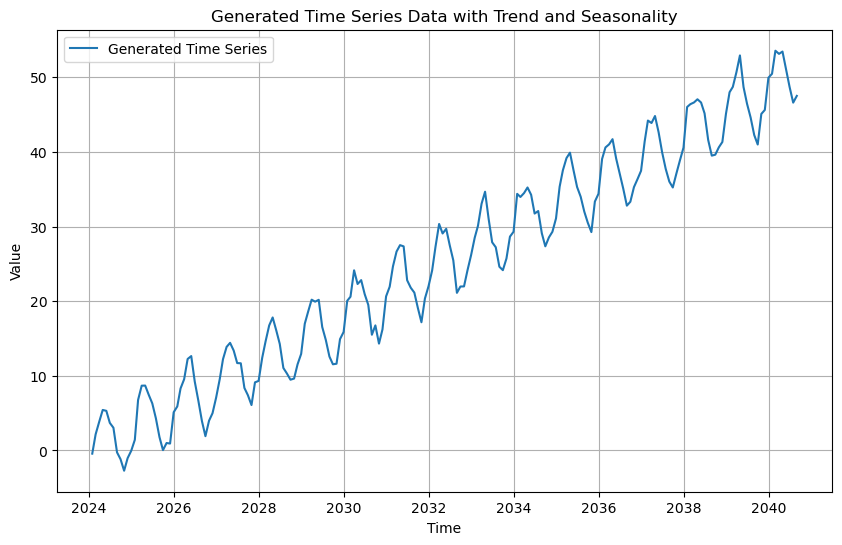

Time series data saved to 'generated_time_series.csv'.


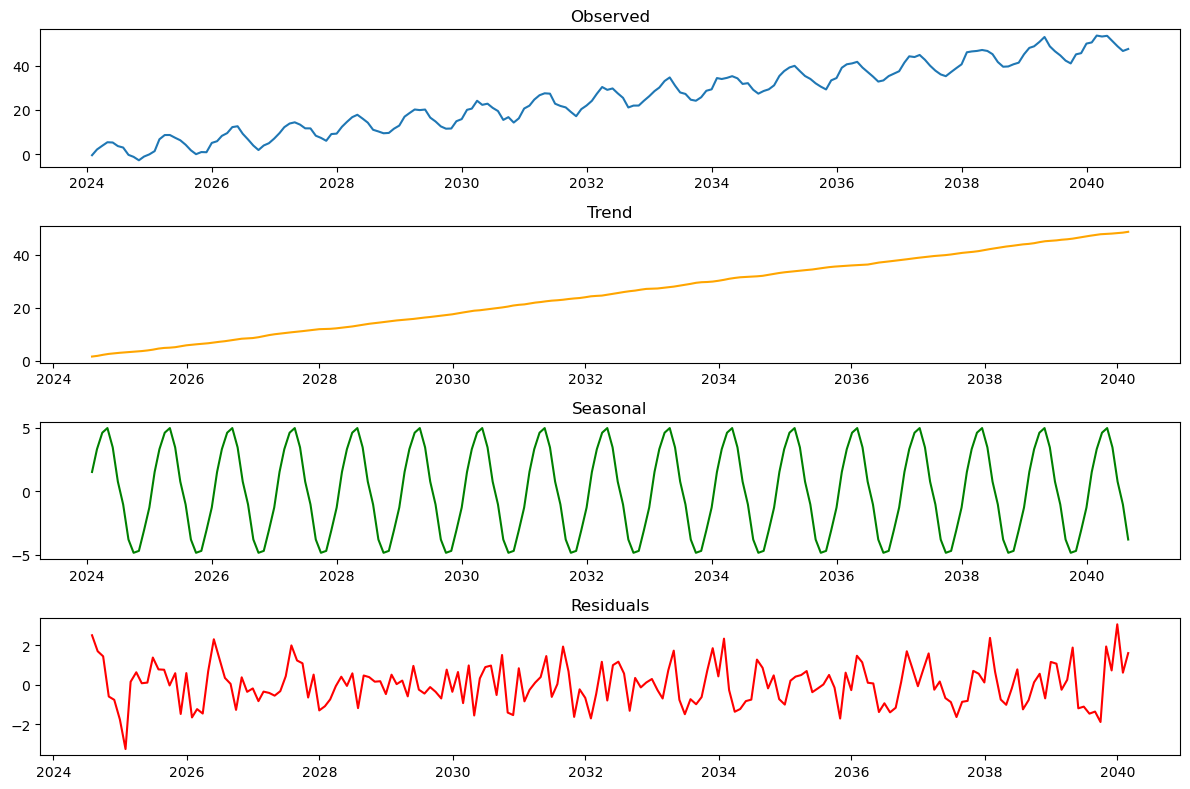

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def generate_time_series(n_periods=100, frequency='days', trend_slope=0.3, seasonal_period='monthly', seasonal_amplitude=5, noise_level=0.5):
    # Set frequency based on the input (days, months, or weeks)
    if frequency == 'days':
        freq = 'D'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    elif frequency == 'months':
        freq = 'ME'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    elif frequency == 'weeks':
        freq = 'W'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    else:
        raise ValueError("Frequency should be 'days', 'months', or 'weeks'.")

    # 1. Create a linear trend: A simple increasing trend from 0 to trend_slope * n_periods
    trend = np.linspace(0, trend_slope * n_periods, n_periods)  # Linear trend

    # 2. Add seasonality based on the chosen period (weekly, monthly, or annual)
    seasonal_component = np.zeros(n_periods)
    if seasonal_period == 'monthly':
        # One full cycle per year (12 months)
        seasonal_frequency = 2 * np.pi / 12  # For monthly frequency
    elif seasonal_period == 'weekly':
        # One full cycle per year (52 weeks)
        seasonal_frequency = 2 * np.pi / 52  # For weekly frequency
    elif seasonal_period == 'annual':
        # One full cycle per year (365 days)
        seasonal_frequency = 2 * np.pi / 365  # For annual frequency
    else:
        raise ValueError("Seasonal period should be 'monthly', 'weekly', or 'annual'.")

    # Smooth seasonal component (sine wave with the defined frequency)
    seasonal_component = seasonal_amplitude * np.sin(np.linspace(0, seasonal_frequency * n_periods, n_periods))

    # 3. Add minimal noise to the time series to make the residuals more realistic
    noise = np.random.normal(0, noise_level, n_periods)

    # 4. Combine the trend and seasonality
    time_series = trend + seasonal_component + noise

    # Prepare data for CSV output
    data = {'Time': time_index[:len(time_series)], 'Value': time_series}
    df = pd.DataFrame(data)

    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Value'], label='Generated Time Series')
    plt.title('Generated Time Series Data with Trend and Seasonality')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save to CSV
    df.to_csv('generated_time_series.csv', index=False)
    print("Time series data saved to 'generated_time_series.csv'.")

    return df

#
def decompose_time_series(df, frequency='D'):
    # Ensure the 'Time' column is in datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Set 'Time' as the index
    df.set_index('Time', inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(df['Value'], model='additive', period=365 if frequency == 'days' else 12)

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')

    plt.tight_layout()
    plt.show()

# Example usage of the function
df = generate_time_series(n_periods=200, frequency='months', trend_slope=0.25, seasonal_period='monthly', seasonal_amplitude=5, noise_level=0.9)

decompose_time_series(df)


## Dataset Overview

##### The dataset is a synthetic time series generated to resemble realistic hotel occupancy behaviour:

Target variable: Hotel_Occupancy_Rate (%)

Date range: 200 monthly observations (≈16 years)

##### Characteristics:

Clear upward trend

Strong annual seasonality


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("generated_time_series.csv")

df['Time'] = pd.to_datetime(df['Time'])
df = df.sort_values("Time")
df.set_index("Time", inplace=True)

df.head()


,Value
Time,
2024-01-31,-0.421567
2024-02-29,2.167836
2024-03-31,3.858995
2024-04-30,5.433626
2024-05-31,5.313518


<Figure size 1000x500 with 0 Axes>

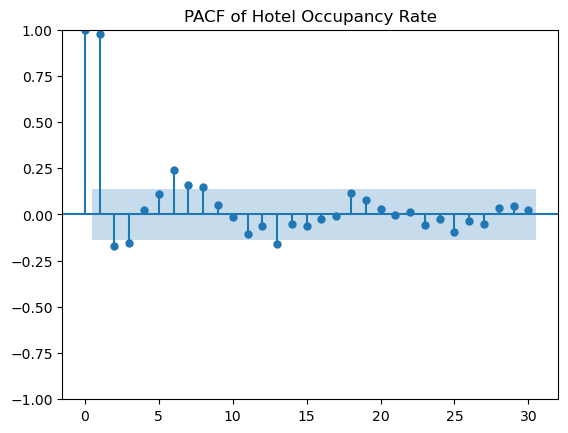

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,5))
plot_pacf(df['Value'], lags=30, method='ywm')
plt.title("PACF of Hotel Occupancy Rate")
plt.show()


The PACF plot for the Hotel Occupancy Rate shows two clear and highly significant spikes at lags 1 and 2, indicating strong short-term autocorrelation. Most subsequent lags fall within the confidence interval apart from small positive spikes at lags 5,6,7 ; however, a small negative spike appears at lag 12 which dips just below the lower confidence bound. Although this effect is weaker than the short-term lags, it is still statistically significant and is consistent with the annual (12-month) seasonality observed in the decomposition plot.

This behaviour occurs because the dataset contains a strong linear trend while the seasonal amplitude is comparatively smaller, which reduces the prominence of seasonal spikes in the PACF. Therefore, based on the PACF, suitable AR orders to test include p = 1 and p = 2 (short-term dependence), and p = 12 to capture the weaker but still meaningful annual seasonal effect.

In [4]:
from statsmodels.tsa.ar_model import AutoReg

p_list = [1, 2, 12]
models = []

for p in p_list:
    model = AutoReg(df['Value'], lags=p, old_names=False).fit()
    models.append((p, model.aic))

models


C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


[(1, np.float64(881.3521567612879)),
 (2, np.float64(837.8837673684785)),
 (12, np.float64(560.6358280079847))]

Autoregressive models with lag orders p = 1, 2, and 12 were fitted based on the PACF interpretation. Their AIC values were AR(1) = 881.35, AR(2) = 837.88, and AR(12) = 560.64. Since the lowest AIC value indicates the best trade-off between fit and model complexity, the AR(12) model provides the best performance. This result supports the presence of a weaker but statistically significant 12-month seasonal dependency in the occupancy rate, consistent with the PACF spike at lag 12 and the annual seasonality observed in the decomposition plot.

C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


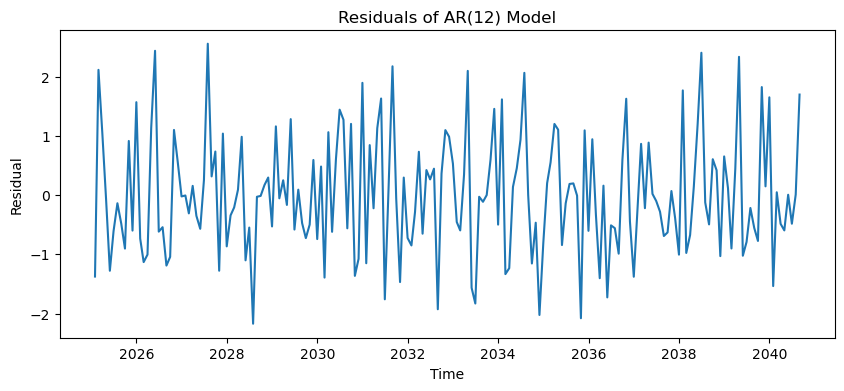

In [5]:
best_model = AutoReg(df['Value'], lags=12, old_names=False).fit()

plt.figure(figsize=(10,4))
plt.plot(best_model.resid)
plt.title("Residuals of AR(12) Model")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()



The residual plot for the AR(12) model shows that the residuals fluctuate randomly around zero with no visible trend or long-term structure. This indicates that the AR(12) model has successfully captured the main components of the time series, including the upward trend and the annual seasonal pattern. The residuals do not display systematic patterns or repeated cycles, which suggests that the model has removed most of the autocorrelation present in the original data. Although there are occasional spikes, these are consistent with the noise level used when generating the synthetic dataset and do not represent significant modelling issues. Overall, the residuals appear approximately random, supporting the suitability of the AR(12) model.

<Figure size 1000x400 with 0 Axes>

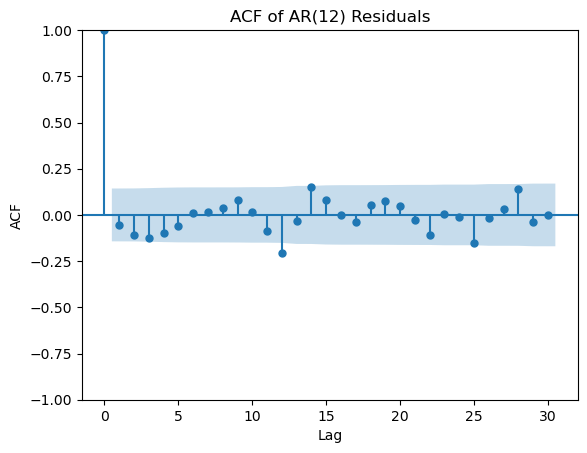

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,4))
plot_acf(best_model.resid, lags=30)
plt.title("ACF of AR(12) Residuals")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()


While a few very small spikes (e.g, at lags 12 and 14) fall slightly outside the confidence interval, these deviations are minor, isolated, and expected when analysing white-noise processes. There is no repeating pattern, no clustering, and no seasonal autocorrelation present. Overall, the ACF plot shows that the residuals are essentially uncorrelated, indicating that the AR(12) model has adequately captured the underlying structure of the time series. The absence of meaningful autocorrelation confirms that the residuals behave like white noise and that no additional AR terms are required.

In [7]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(best_model.resid)
dw_stat


np.float64(2.088627686303231)

To further assess whether the AR(12) model left any autocorrelation in the residuals, the Durbin–Watson statistic was calculated. The model produced a value of DW = 2.089, which is extremely close to the ideal value of 2. This indicates no evidence of residual autocorrelation, meaning that the AR(12) model successfully captured the temporal dependence in the original series. Together with the residual ACF plot, this provides strong confirmation that the AR(12) specification is appropriate and that the residuals behave like white noise.

In [8]:
import pmdarima as pm

auto_arma = pm.auto_arima(
    df['Value'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    seasonal=False,
    trace=True,
    information_criterion='aic'
)

print(auto_arma.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=880.799, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=843.003, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=857.973, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=881.191, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=837.812, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=823.030, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=794.213, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=709.627, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=598.386, Time=0.40 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=604.865, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=697.197, Time=0.11 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] intercept
Total fit time: 2.049 seconds
                               SARIMAX Resu

An automatic ARMA order selection was performed using the auto_arima procedure. The algorithm selected an ARIMA(5,1,1) model, indicating that a first difference was required to remove the strong linear trend present in the original series. The resulting model includes significant autoregressive terms at lags 1, 2, and 5, as well as a significant moving-average term at lag 1 (all p < 0.01). This confirms the presence of short-term dependency consistent with the earlier PACF analysis.

Model diagnostics support the adequacy of the ARIMA(5,1,1) specification: the Ljung–Box p-value of 0.88 indicates no remaining autocorrelation in the residuals, while the Jarque–Bera p-value of 0.18 suggests residual normality. Additionally, the heteroskedasticity test provides no evidence of non-constant variance. Overall, the ARIMA(5,1,1) model provides a statistically sound and well-fitting representation of the time series.

C:\Users\JohnJ\AppData\Local\Temp\ipykernel_22828\2092637036.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(df.index[-1], periods=n_forecast+1, freq='M')[1:]


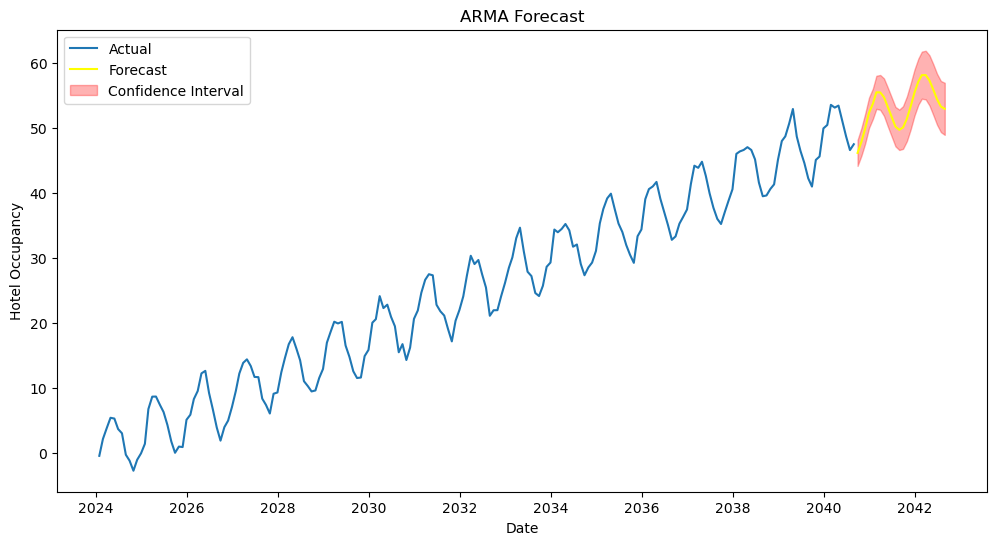

In [13]:
n_forecast = 24
forecast, conf_int = auto_arma.predict(n_periods=n_forecast, return_conf_int=True)

future_index = pd.date_range(df.index[-1], periods=n_forecast+1, freq='M')[1:]

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Value'], label="Actual")
plt.plot(future_index, forecast, label="Forecast", color='yellow')
plt.fill_between(future_index, conf_int[:,0], conf_int[:,1],
                 color='red', alpha=0.3, label="Confidence Interval")

plt.title("ARMA Forecast")
plt.xlabel("Date")
plt.ylabel("Hotel Occupancy")
plt.legend()
plt.show()


The ARIMA forecast extends the hotel occupancy rate for the next 24 months beyond the available historical data. The model captures the two key patterns present in the original time series: a strong upward long-term trend and a clear seasonal cycle.

The forecasted values continue this behaviour, showing steadily increasing occupancy levels over time, consistent with the linear trend component observed in the decomposition analysis. The seasonal pattern also persists, with regular peaks and troughs that mirror the annual seasonality present in the historical data. This indicates that the ARIMA(5,1,1) model has successfully learned both the short-term autocorrelation structure and the seasonal dynamics of the time series.

The confidence interval (shaded red region) widens gradually as the forecast horizon increases. This widening is expected: uncertainty naturally grows the further the model predicts into the future. However, the interval remains reasonably narrow, suggesting the model is stable and that the underlying pattern of the data is predictable. The forecast line remains well within realistic bounds, showing no signs of divergence or instability.

Overall, the ARIMA forecast provides a plausible and coherent projection of future hotel occupancy. For the business context of V.Ger Travel, this forecast would allow the company to anticipate demand several months ahead, enabling more informed planning for staffing, promotions, resource allocation, and capacity management.

In [14]:
from statsmodels.tsa.arima.model import ARIMA

manual_arima = ARIMA(df['Value'], order=(5,1,1)).fit()

print(manual_arima.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  200
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -341.599
Date:                Mon, 17 Nov 2025   AIC                            697.197
Time:                        16:50:06   BIC                            720.251
Sample:                    01-31-2024   HQIC                           706.528
                         - 08-31-2040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3696      0.086      4.287      0.000       0.201       0.539
ar.L2          0.2390      0.075      3.207      0.001       0.093       0.385
ar.L3         -0.0100      0.081     -0.124      0.9

C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\JohnJ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


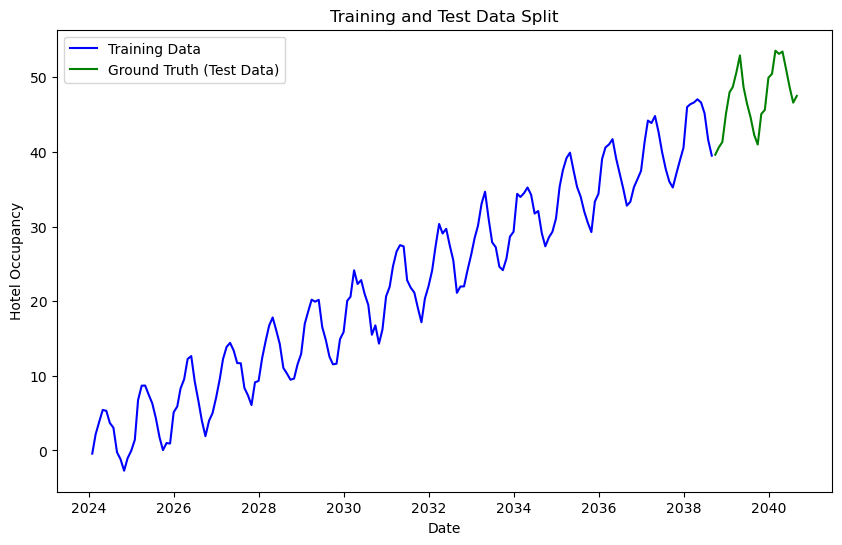

In [18]:
## Train/Test Split for Your Dataset

forecast_horizon = 24  

train_data = df[:-forecast_horizon]
test_data = df[-forecast_horizon:]

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Value'], 
         label='Training Data', color='blue')

plt.plot(test_data.index, test_data['Value'], 
         label='Ground Truth (Test Data)', color='green')

plt.title('Training and Test Data Split')
plt.xlabel('Date')
plt.ylabel('Hotel Occupancy')
plt.legend()
plt.show()


In [19]:
sarima_model = pm.auto_arima(
    train_data['Value'],
    start_p=1, max_p=3,
    start_q=1, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    d=1,
    D=1,
    m=12,                 # monthly seasonality
    seasonal=True,
    stepwise=True,
    trace=True,
    information_criterion='aic'
)

print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=628.452, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=552.863, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=609.424, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=541.515, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=535.320, Time=0.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=533.354, Time=0.18 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=533.427, Time=0.14 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=535.322, Time=0.57 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=533.493, Time=0.26 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=558.037, Time=0.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=527.313, Time=0.25 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=52